# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols

)

In [3]:
DATASET_PATH = "./data/heart_disease/"

In [4]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [5]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [7]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [8]:
y = my_data[target].values

In [9]:
sano_mask = y == 0
enfermo_mask = y > 0

In [10]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [11]:
y_class

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [12]:
pd.get_dummies(my_data[categorical_features])

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,0.0,0.0,0.0,2.0,True,False,False,False,False,False,False,True,False
298,1.0,4.0,1.0,0.0,0.0,2.0,False,False,True,False,False,False,False,True,False
299,1.0,4.0,0.0,0.0,1.0,2.0,False,True,False,False,False,False,False,True,False
300,0.0,2.0,0.0,2.0,0.0,2.0,False,True,False,False,False,True,False,False,False


In [13]:
pca = PCA(n_components=0.9).fit(my_data[numerical_features])

pca.n_components_

2

In [14]:
X_transformed = pca.transform(my_data[numerical_features])

In [15]:
X_transformed

array([[ 4.15197276e+01,  6.04359951e+01],
       [-1.75994017e+01,  3.01920764e+01],
       [ 2.12973462e+00, -5.45861630e+01],
       [-4.34743454e+01, -3.24753433e+01],
       [-1.15270317e+01, -3.99676683e+01],
       [ 2.18359694e+01, -1.36251712e+01],
       [ 1.06416100e+02, -2.03988377e+01],
       [ 7.52203752e+00,  4.50457172e+00],
       [-4.33295298e+01, -6.79174957e+00],
       [-5.40858010e+01,  3.61377300e+00],
       [ 4.76163183e+01, -4.88514137e+00],
       [ 9.29523476e+00,  1.06638337e+01],
       [ 1.50008069e+01, -3.47313944e+01],
       [-4.58080508e+01, -1.54606005e+01],
       [-7.77844491e+01, -3.21393208e+01],
       [-1.92309131e+01, -2.71659586e+01],
       [-7.41691526e+00, -1.42000964e+01],
       [ 2.79752555e+01,  1.36751141e+01],
       [ 1.87164266e+01, -3.09825000e+01],
       [-3.63354231e+01,  8.63630131e+00],
       [ 3.71347167e+01, -1.67444313e+01],
       [ 3.66305869e+01, -1.51122588e+01],
       [-2.27632860e+01, -3.20576672e+01],
       [-4.

<Axes: >

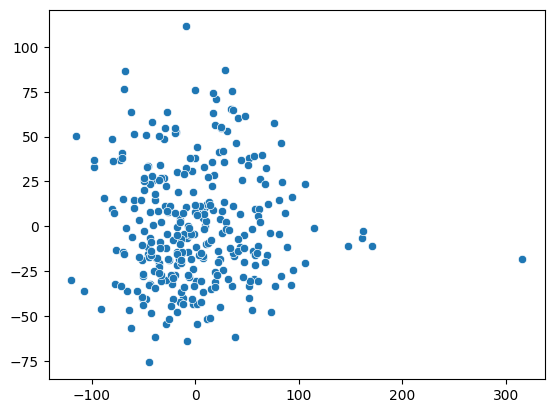

In [16]:
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1])

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [1]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

## Resolucion

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Cargo Pokemon dataset
df_pokemon = pd.read_csv('./data/pokemon/pokemon.csv',
                       delimiter=',',
                       header=0)

In [4]:
# Forma de dataset
df_pokemon.shape

(801, 41)

In [5]:
df_pokemon

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [6]:
# Columnas del dataset
df_pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [7]:
# Tipo de datos de cada columna
df_pokemon.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [8]:
# Metricas estadisticas de interes de features numericos
df_pokemon.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [9]:
target='is_legendary'

In [11]:
# Veo distribucion de pokemones legendarios y no legendarios
conteo=df_pokemon[target].value_counts() # tenemos 731 pokemones no legendarios y 70 legendarios (es un dataset no equilibrado)
conteo

is_legendary
0    731
1     70
Name: count, dtype: int64

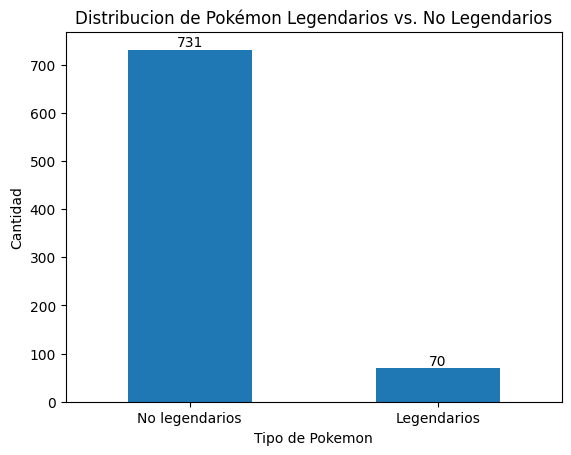

In [13]:
# Barploteo lo cantidad de pokemones legendarios vs no legendarios
X_labels=["No legendarios", "Legendarios"]
ax=conteo.plot(kind='bar',rot=0)
ax.set_title('Distribucion de Pokémon Legendarios vs. No Legendarios')
ax.set_xticklabels(X_labels)
ax.set_xlabel('Tipo de Pokemon')
ax.set_ylabel('Cantidad')
for i, v in enumerate(conteo):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.show()

In [12]:
# Df con pokemones legendarios
pokemon_legendarios = df_pokemon[df_pokemon[target] == 1]

# Imprimir los nombres de los Pokémon que cumplen con la condición
print(pokemon_legendarios['name'])


143      Articuno
144        Zapdos
145       Moltres
149        Mewtwo
150           Mew
          ...    
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, Length: 70, dtype: object


In [14]:
# Seteo de df con variables a utilizar para la prediccion
pokemon=df_pokemon[["height_m","weight_kg","hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "generation","is_legendary"]]

In [15]:
# Verifico presencia de valores nulos
pokemon.isnull().sum()

height_m        20
weight_kg       20
hp               0
attack           0
defense          0
sp_attack        0
sp_defense       0
speed            0
generation       0
is_legendary     0
dtype: int64

In [16]:
# Reemplazo valores nulos en columnas por su media 
mean_height=pokemon.height_m.mean()
mean_weight=pokemon.weight_kg.mean()
pokemon.height_m.fillna(mean_height,inplace=True)
pokemon.weight_kg.fillna(mean_weight,inplace=True)

C:\Users\matia\AppData\Local\Temp\ipykernel_1356\2179335716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon.height_m.fillna(mean_height,inplace=True)
C:\Users\matia\AppData\Local\Temp\ipykernel_1356\2179335716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon.weight_kg.fillna(mean_weight,inplace=True)


In [17]:
# Verificación de valores nulos
pokemon.isnull().sum()

height_m        0
weight_kg       0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
is_legendary    0
dtype: int64

<Axes: >

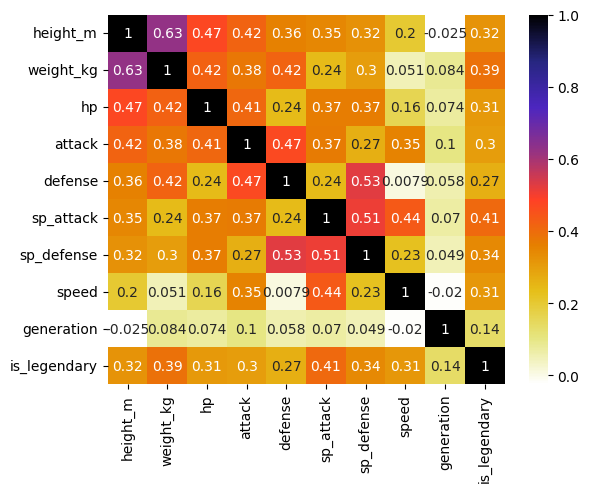

In [18]:
# Mapa de calor con correlacion entre variables
corr=pokemon.corr()
sns.heatmap(corr,annot=True, cmap=plt.cm.CMRmap_r)

In [19]:
# Separacion en features y target
X=pokemon[["height_m","weight_kg","hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "generation"]]
y=pokemon["is_legendary"]

In [20]:
#Spliteo para realizar entrenamiento y test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
#Inicializo Modelo
model_log=LogisticRegression(random_state=42)

In [22]:
# Fit
model_log.fit(X_train,y_train)

C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [24]:
# Realizo predicciones
y_pred=model_log.predict(X_test)

In [25]:
print("Exactitud",accuracy_score(y_test,y_pred))
print("Matriz de confusion: \n", confusion_matrix(y_test, y_pred))


Exactitud 0.9128630705394191
Matriz de confusion: 
 [[213   3]
 [ 18   7]]


In [26]:
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))


Informe de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       216
           1       0.70      0.28      0.40        25

    accuracy                           0.91       241
   macro avg       0.81      0.63      0.68       241
weighted avg       0.90      0.91      0.90       241



Se puede observar que el modelo tiene 213 TN, 3 FN , 18 FP y 7 TP. Se puede ver que para la clase no legendario (0) el modelo perfome muy bien con valores de precision, recall y f1 score de 0.92,0.99,0.95 respectivamente. Esto no pasa para la clase legendario donde puede ver que el modelo tiene cierta dificultades en clasificar con valores bajos de precision, recall y f1 score (0.70,0.28,0.4 respectivamente) esto puede deberse al que el dataset de pokemon es un conjunto de datos muy balanceado a nivel clases legendarios y no legendarios. De igual manera, repetiremos proceso con otro modelo para comparar resultados

In [27]:
# Repetimos proceso con Arbol de decision
model_dectree=DecisionTreeClassifier(random_state=42)

In [28]:
model_dectree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred_tree=model_dectree.predict(X_test)

In [30]:
print("Exactitud",accuracy_score(y_test,y_pred))
print("Matriz de confusion: \n", confusion_matrix(y_test, y_pred_tree))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred_tree))

Exactitud 0.9128630705394191
Matriz de confusion: 
 [[204  12]
 [ 13  12]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       216
           1       0.50      0.48      0.49        25

    accuracy                           0.90       241
   macro avg       0.72      0.71      0.72       241
weighted avg       0.89      0.90      0.90       241



Al igual que en el modelo de regresion logisitica podemos ver que Decision Tree tampoco tiene muy bueno resultados en la clasificacion de pokemon legandarios. Mejora las metricas de recall y f1 score pero disminuye la precision. Por el lado de la clase no legendario, se puede observar que el modelo baja en performance al lado de logist regression pero sigue tiene buen nivel de precisión y sensibilidad.

In [31]:
# Haremos competir modelos usando varios folds
from sklearn.model_selection import  StratifiedKFold

# Definir la estrategia de validación cruzada (StratifiedKFold para problemas de clasificación)
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el árbol de decisión mediante validación cruzada
tree_scores = cross_val_score(model_dectree, X, y, cv=cv_stratified, scoring='accuracy')

# Evaluar la regresión logística mediante validación cruzada
logistic_scores = cross_val_score(model_log, X, y, cv=cv_stratified, scoring='accuracy')

# Imprimir las precisiones medias
print("Precisión media del árbol de decisión:", tree_scores.mean())
print("Precisión media de la regresión logística:", logistic_scores.mean())

Precisión media del árbol de decisión: 0.9113431677018633
Precisión media de la regresión logística: 0.9450543478260869


C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [32]:
# Ahora probaremos los modelos con varios hiperparametros
from sklearn.model_selection import GridSearchCV

# Seteamos los hiperparametros de los modelos
tree_params={'max_depth':[None,10,20,30],'min_samples_split':[2,5,10]}
logistic_params={"C":[0.001,0.01,0.1,1,10,100]}

# inicializamos los modelos
tree_grid_search=GridSearchCV(model_dectree,param_grid=tree_params,cv=5, scoring="accuracy")
logistic_grid_search=GridSearchCV(model_log,param_grid=logistic_params,cv=5, scoring="accuracy")

# Fiteo

tree_grid_search.fit(X_train,y_train)
logistic_grid_search.fit(X_train,y_train)

# Imprimir los mejores hiperparámetros y precisiones
print("Mejores hiperparámetros para árbol de decisión:", tree_grid_search.best_params_)
print("Precisión del árbol de decisión:", tree_grid_search.best_score_)

print("\nMejores hiperparámetros para regresión logística:", logistic_grid_search.best_params_)
print("Precisión de la regresión logística:", logistic_grid_search.best_score_)





C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Mejores hiperparámetros para árbol de decisión: {'max_depth': None, 'min_samples_split': 5}
Precisión del árbol de decisión: 0.9339285714285716

Mejores hiperparámetros para regresión logística: {'C': 10}
Precisión de la regresión logística: 0.9535714285714285


C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Resultado de Grid Search:

-Mejores hiperparámetros para árbol de decisión: {'max_depth': None, 'min_samples_split': 5}
Precisión del árbol de decisión: 0.9339285714285716

-Mejores hiperparámetros para regresión logística: {'C': 10}
Precisión de la regresión logística: 0.9535714285714285


Aclaración: Es importante destacar que la precisión (accuracy) reportada corresponde al rendimiento global del modelo, abarcando tanto la clasificación de Pokémon legendarios como no legendarios. Como mencionamos previamente, el conjunto de datos presenta un desequilibrio, y los modelos tienen un muy buen desempeño en la predicción de Pokémon no legendarios. Por lo tanto, se debe interpretar con precaución esta métrica, ya que existe un sesgo inherente debido a la preponderancia de clasificaciones correctas de Pokémon no legendarios. Esta precisión no debe considerarse como definitiva y se recomienda analizar otras métricas y considerar la naturaleza desbalanceada del conjunto de datos al evaluar el rendimiento del modelo.



In [47]:
# EL mejor metodo fue Logist Regression con C:10. Vamos a predecir que daria este nuevo pokemon

best_logistic_model = logistic_grid_search.best_estimator_
logistic_predictions = best_logistic_model.predict(X_test)

print("Exactitud",accuracy_score(y_test,logistic_predictions))
print("Matriz de confusion: \n", confusion_matrix(y_test, logistic_predictions))
print("\nInforme de clasificación:\n", classification_report(y_test, logistic_predictions))




Exactitud 0.941908713692946
Matriz de confusion: 
 [[212   4]
 [ 10  15]]

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       216
           1       0.79      0.60      0.68        25

    accuracy                           0.94       241
   macro avg       0.87      0.79      0.82       241
weighted avg       0.94      0.94      0.94       241



Conclusion:

Podemos observar lo siguiente al correr el modelo de logist Regression luego del uso de busqueda de mejores hiperparametros mediante GridSearc:

- El modelo sigue teniendo valores altos de precision, recall y f1 score (0.95,0.98,0.97) para la clase de pokemones no legendarios.
- El modelo mejora bastante los valores de precision, recall y f1 score para la clase de pokemones legendarios.

In [198]:
# Predecimos nuevos valores
new_pokemon_featuures = [[4,120,130, 110, 90, 130, 110, 100, 7],[1,80.5,80, 95, 115, 130, 115, 65, 7]]
for new in new_pokemon_featuures:
    prediction = best_model.predict(new_pokemon_stats)
    if prediction[0] == 1:
        print("El pokemon no es legendario!")
    else:
        print("El Pokememon es legendario.")

The Pokemon is not legendary.
The Pokemon is not legendary.


C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\matia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [190]:
prediction

array([0], dtype=int64)